In [38]:
import pandas as pd
import numpy as np

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

(40, 2) (40,)


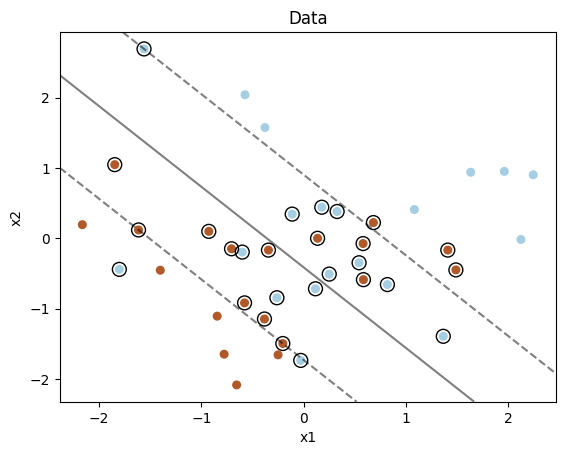

In [102]:
n_cls = 20   # Number of samples in each class.
 
np.random.seed(1)  # for reproducibility
x11 = np.random.normal(0.5, 1, (n_cls, 1))
np.random.seed(2)  # for reproducibility
x12 = np.random.normal(0.4, 1, (n_cls, 1))
np.random.seed(3)  # for reproducibility
x21 = np.random.normal(-0.3, 1, (n_cls, 1))
np.random.seed(4)  # for reproducibility
x22 = np.random.normal(-0.5, 1, (n_cls, 1))

X = np.vstack((
    np.hstack((x11, x12)),
    np.hstack((x21, x22))
))
 
y = np.hstack((-1 * np.ones(n_cls), +1 * np.ones(n_cls)))
clf = svm.SVC(kernel='linear', C=1000, random_state=1, probability=True)
clf.fit(X, y)

fig = plt.figure(1)
plt.clf()
 
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
 
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
 
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data')
plt.show()

[[0.62901122 0.37098878]
 [0.26314804 0.73685196]]


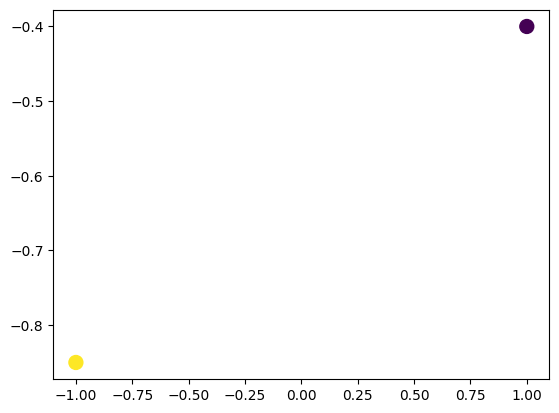

In [14]:
X_new = np.array([
    [1, -0.4],
    [-1, -0.85],
    ])
 
y_new = clf.predict(X_new)
 
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, s=100)
fig.canvas.draw()
fig.canvas.flush_events()

# Get posterior probabilities for predictions (requires SVC to be created with
#   `probability=True`).
post_probs = clf.predict_proba(X_new)
print(post_probs)

Klasyfikowacja na zbiorze iris


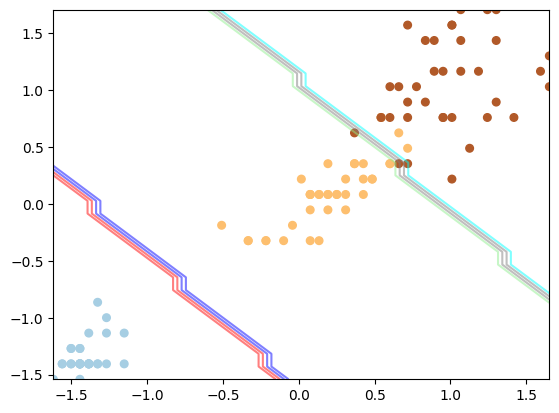

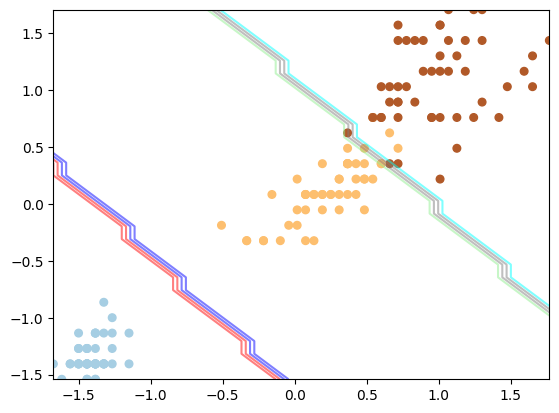

In [116]:
from sklearn.datasets import load_iris
from matplotlib.colors import   ListedColormap

data = load_iris()
x = data.data[:,[2,3]]
y = data.target

plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Iris data')

#Podzielenie zbioru na testowy i treningowy
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#Skalowanie danych
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Tworzenie klasyfikatora
clf = svm.SVC(kernel='linear', C=1000, random_state=1, probability=True)
clf.fit(X_train, y_train)

def plot_points(Xin, yin):
    plt.clf()

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xlim ,ylim = [Xin[:,0].min(),Xin[:,0].max()], [Xin[:,1].min(),Xin[:,1].max()]
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.predict(xy).reshape(XX.shape)

    cmap = ListedColormap(['red', 'blue', 'lightgreen','gray','cyan'])

    plt.contour(XX,YY, Z, alpha=0.5, cmap=cmap)

    plt.scatter(Xin[:, 0], Xin[:, 1], c=yin, s=30, cmap=plt.cm.Paired)


plot_points(X_train, y_train)
plt.show()

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_points(X_combined, y_combined)
plt.show()